# Visualize Stock Trends With Intervals

In [1]:
import os
import sys
from pathlib import Path

# Define BASE_DIR and adjust sys.path before importing
BASE_DIR = Path(os.getcwd()).parent  # Points to stat_656_autotrader/ from Notebooks/
sys.path.append(str(BASE_DIR))
print(f"Project root added to sys.path: {BASE_DIR}")

from src.visualizations.stock_price_trends import plot_stock_trends_with_intervals

Project root added to sys.path: d:\dev\stat_656_autotrader


Connecting to database: D:\dev\stat_656_autotrader\databases\assets.db
Querying MCD prices for last 90 trading days from 2024-12-04 to 2025-04-15
Fetched 90 price records for MCD


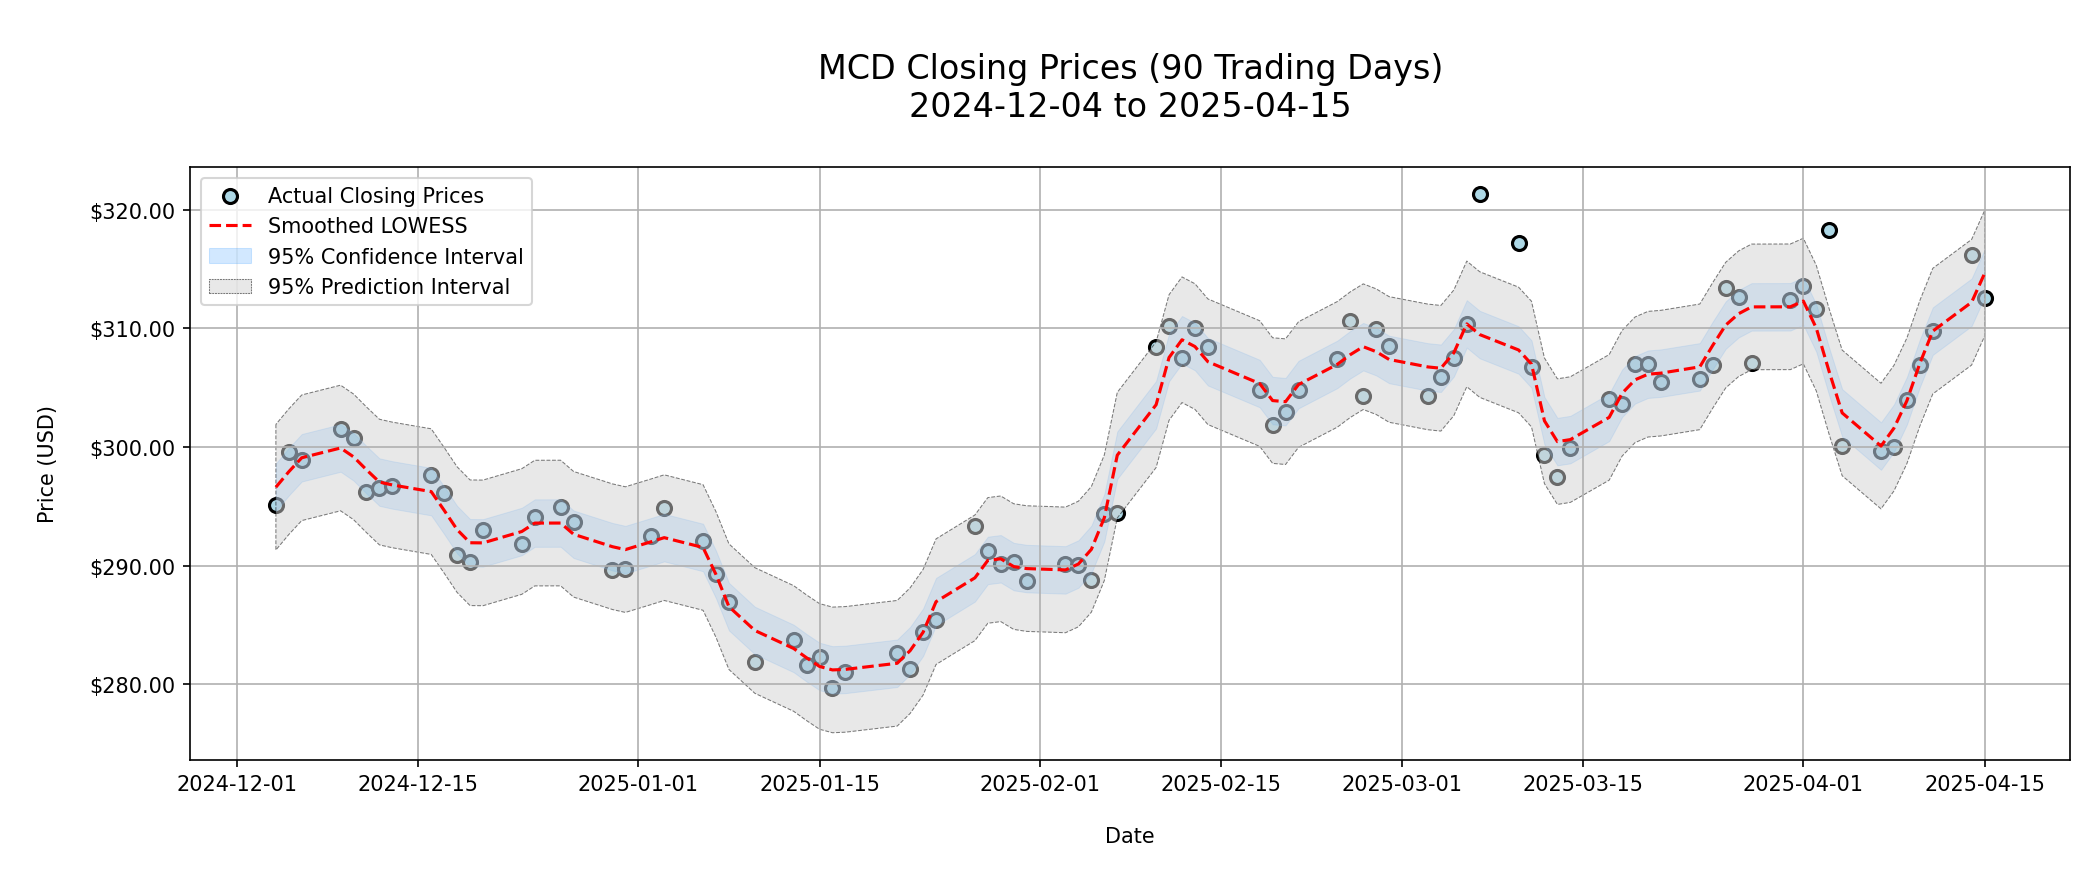

In [3]:
plot_stock_trends_with_intervals(
    symbol = 'MCD',
    days_back=90,
    smoothing_window=7,
    smoother="lowess",
    price_type="close",
    show_actual_line=False,
    calendar_days=False,
    ci=95
    )